In [1]:
from matplotlib import cm

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import pandas as pd

Load data and extract numpy array of just counts. 

In [3]:
data = pd.read_csv('counts_final.txt', sep='\t')
counts_matrix = data.to_numpy()[:, 1:13] # Some weirdness with an extra column of nans
transport_domain_names = list(data.columns[1:13]) 

In [4]:
def create_and_fit_lda(n_components, count_matrix):
    lda = LatentDirichletAllocation(n_components=n_components)
    lda.fit(count_matrix)
    topic_distributions = lda.transform(count_matrix)
    return lda, topic_distributions

In [31]:
LatentDirichletAllocation

sklearn.decomposition.online_lda.LatentDirichletAllocation

In [30]:
lda

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=6, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [27]:
def plot_lda(lda: LatentDirichletAllocation, 
            topic_matrix: np.ndarray):
    """ Creates plot of topic proportions for a set of samples.
    
    Inputs
        lda: An already fitted LDA object.
        topic_matrix: The result of having called lda.transform on that data.
    
    Results
        1. A global proportion plot (probably could be sped up)
        2. A horizontal barplot of all topic distributions with aligned y-axis.
    """
    last_topic = np.zeros_like(topic_matrix[:, 0])
    x_range = np.arange(topic_matrix.shape[0])
    cmap = plt.get_cmap('Accent')
    num_topics = topic_matrix.shape[1]
    plt.title('Global Topic Proportions for Each BGC')
    for i in range(num_topics):
        current_topic = topic_matrix[:, i]
        plt.bar(x_range, current_topic, bottom=last_topic, color=cmap(i/num_topics), label=f'Topic {i+1}')
        plt.ylabel('Proportion in Each Topic')
        plt.xlabel('BGC number, as ordered in .txt file')
        plt.legend()
        last_topic += current_topic
    
    plt.show()
#     plt.savefig('lda_proportions_example.png')
#     plt.close()
    
    fig, ax = plt.subplots(1, num_topics, sharey=True)
    if num_topics == 1:
        y_range = np.arange(len(transport_domain_names))
        plt.barh(y_range, lda.components_[0], color=cmap(0/num_topics))
        plt.yticks(ticks=y_range, labels=transport_domain_names)
        plt.title(f'Domains Used by Topic {1}')
        plt.show()
    else:
        for i, (topic, axarr) in enumerate(zip(lda.components_, ax)):
            y_range = np.arange(len(transport_domain_names))
            axarr.barh(y_range, topic, color=cmap(i/num_topics))
            axarr.set_yticks(y_range)
            axarr.set_yticklabels(transport_domain_names)
            axarr.set_title(f'Topic {i+1}')
        plt.show()
#     plt.savefig('lda_topic_distribution_example.png')
#     plt.close()

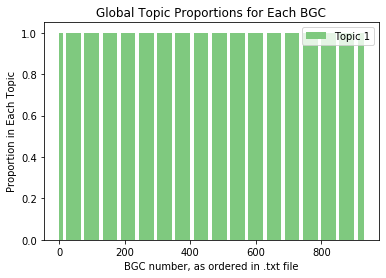

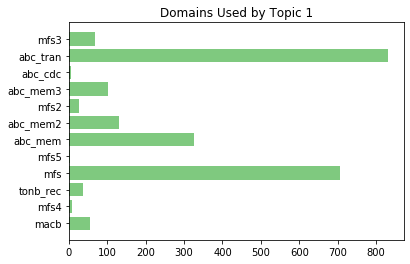

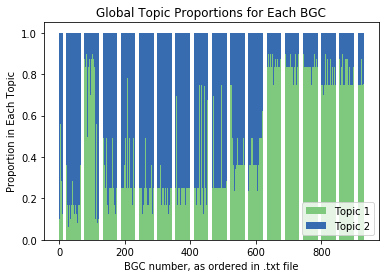

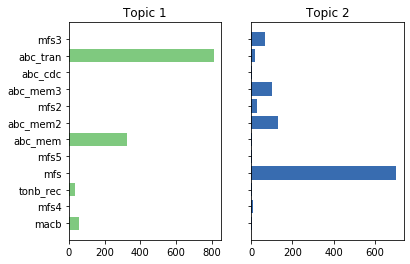

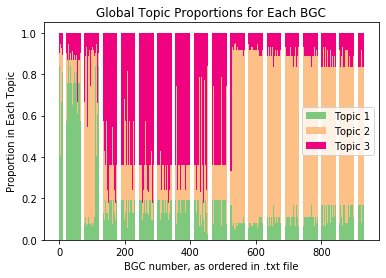

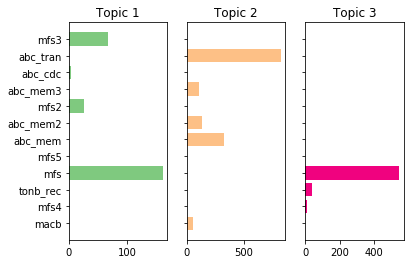

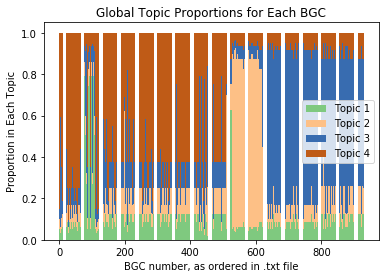

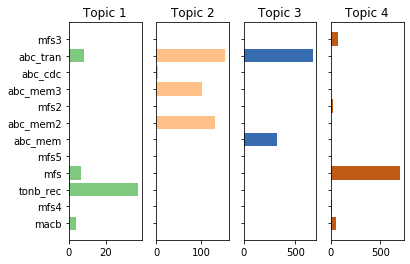

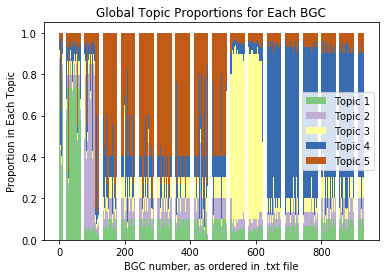

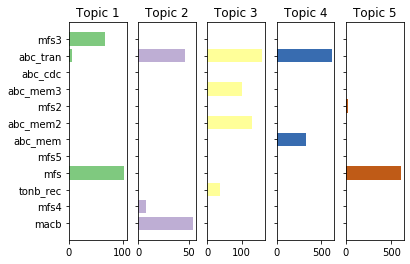

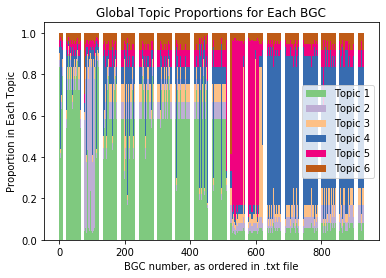

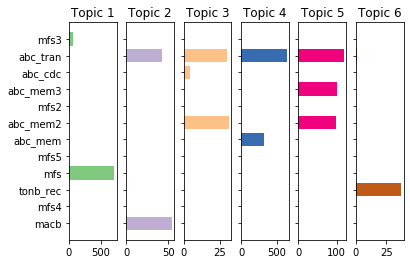

In [28]:
for i in range(1, 7):
    lda, matrix = create_and_fit_lda(i, counts_matrix)
    plot_lda(lda, matrix)

Susan Holmes would punch me for applying t-SNE to LDA topic proportions. But I was curious what would happen!

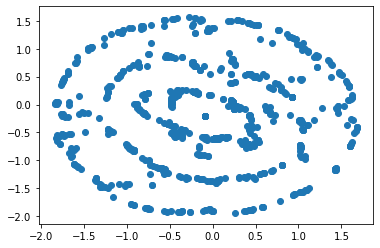

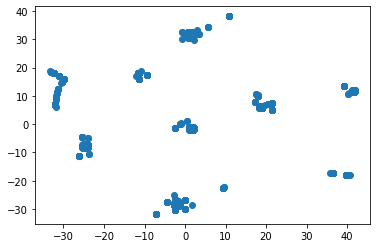

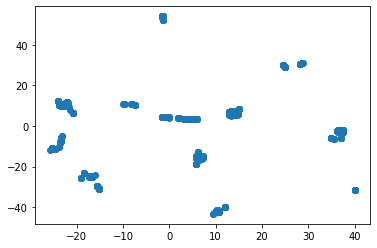

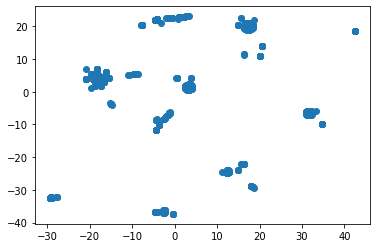

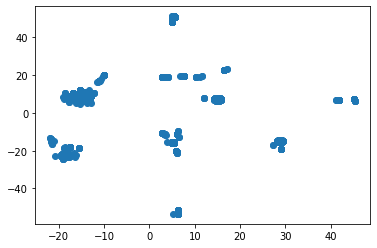

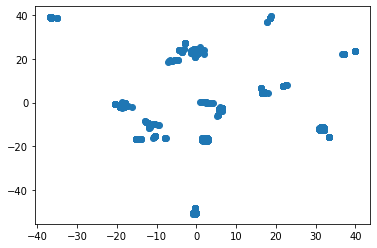

In [29]:
for i in range(1, 7):
    lda, matrix = create_and_fit_lda(i, counts_matrix)
    embedded = TSNE().fit_transform(matrix)
    plt.scatter(embedded[:, 0], embedded[:, 1])
    plt.show()